In [3]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

✅ All libraries imported successfully!
📊 Creating Synthetic Dataset...
----------------------------------------
Dataset created with 300 samples and 2 features
True number of clusters: 3
Data shape: (300, 2)
Scaled data range: [-1.66, 1.85]


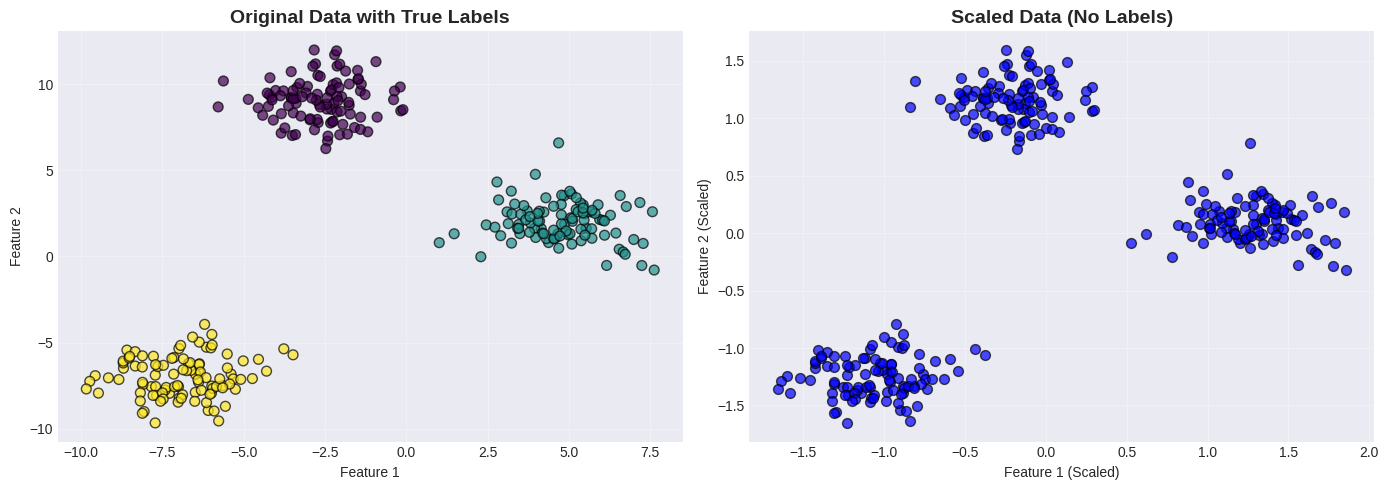


🔍 Running K-means Clustering...
----------------------------------------
✅ Convergence reached at iteration 2
K-means completed successfully!
Number of clusters: 3
Final inertia (WCSS): 27.7665
Centroid locations:
  Cluster 0: [1.27800165 0.09737451]
  Cluster 1: [-1.06612934 -1.25145537]
  Cluster 2: [-0.21187231  1.15408087]

📈 Visualizing Clustering Results...
----------------------------------------
✅ Convergence reached at iteration 2
✅ Convergence reached at iteration 2
✅ Convergence reached at iteration 2
✅ Convergence reached at iteration 11
✅ Convergence reached at iteration 11
✅ Convergence reached at iteration 11
✅ Convergence reached at iteration 14
✅ Convergence reached at iteration 11
✅ Convergence reached at iteration 11
✅ Convergence reached at iteration 2
✅ Convergence reached at iteration 2
✅ Convergence reached at iteration 11
✅ Convergence reached at iteration 11
✅ Convergence reached at iteration 11
✅ Convergence reached at iteration 14
✅ Convergence reached at it

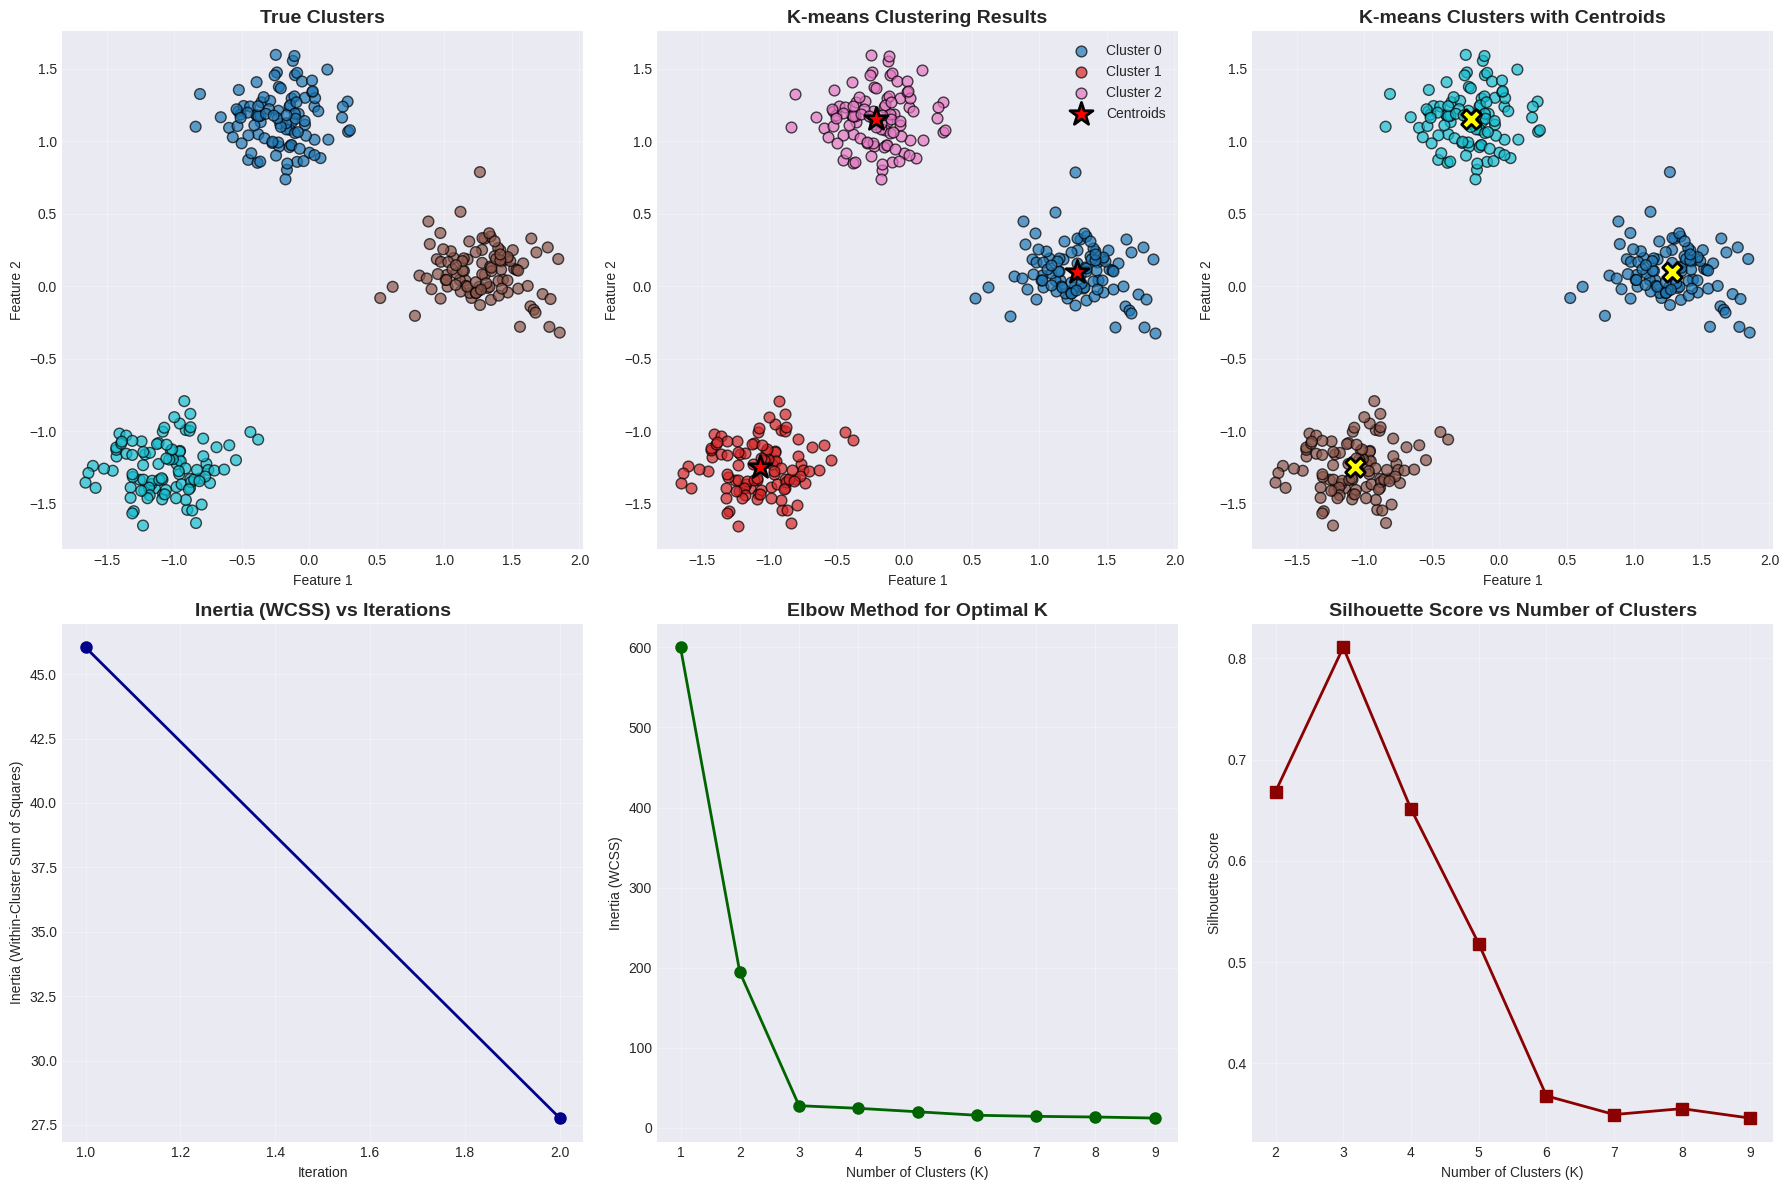


📊 Evaluating Clustering Performance...
----------------------------------------
Performance Metrics:
  • Silhouette Score: 0.8109
    - Range: -1 to 1 (higher is better)
    - Interpretation: Strong structure
  • Davies-Bouldin Index: 0.2628
    - Range: 0 to ∞ (lower is better)
  • Within-Cluster Sum of Squares (Inertia): 27.7665

🌺 Real-World Example: Iris Dataset
----------------------------------------
Iris Dataset Info:
  • Samples: 150
  • Features: 4
  • Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  • Target names: ['setosa' 'versicolor' 'virginica']
✅ Convergence reached at iteration 4


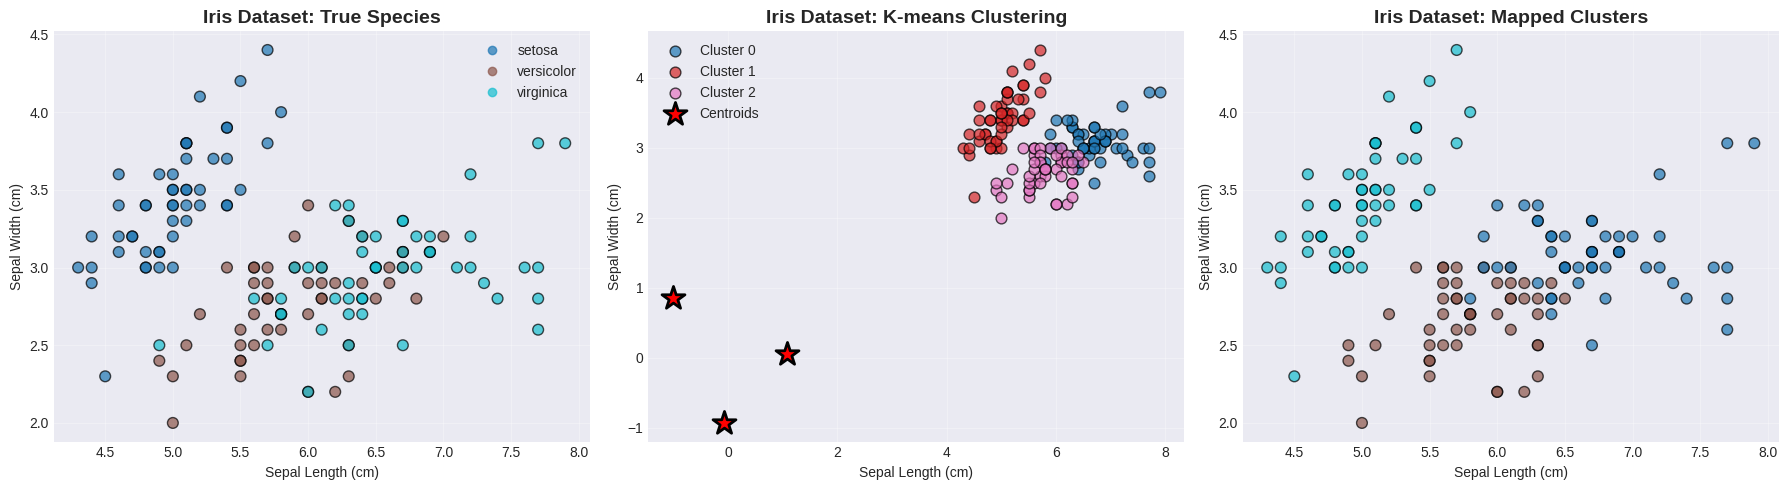


Iris Dataset Clustering Performance:
  • Silhouette Score: 0.4566
    - Interpretation: Weak structure
  • Davies-Bouldin Index: 0.8323
  • Inertia: 140.0820

🔬 Interactive Experimentation Section
Running experiments with different K values and initialization methods...
✅ Convergence reached at iteration 2
✅ Convergence reached at iteration 2
✅ Convergence reached at iteration 3
✅ Convergence reached at iteration 2
✅ Convergence reached at iteration 5
✅ Convergence reached at iteration 11
✅ Convergence reached at iteration 7
✅ Convergence reached at iteration 11

📋 Experiment Results:
 K Init Method    Inertia  Silhouette
 2      random 194.584153    0.668370
 2   k-means++ 194.584153    0.668370
 3      random  27.766515    0.810934
 3   k-means++  27.766515    0.810934
 4      random  23.445523    0.667165
 4   k-means++  24.502748    0.651255
 5      random  19.076271    0.515690
 5   k-means++  20.185492    0.518163


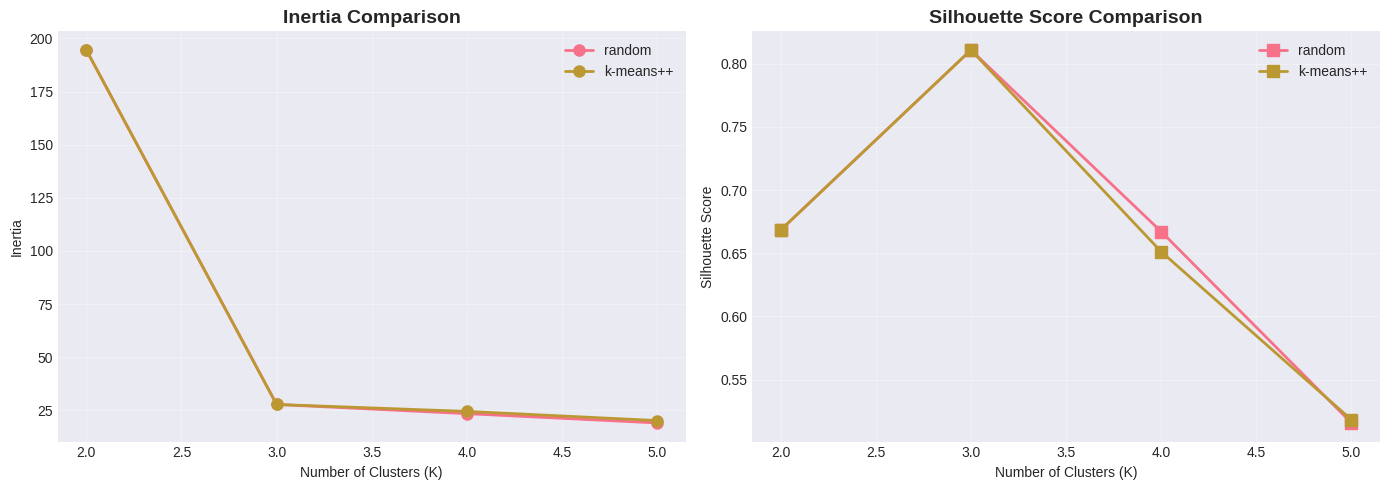


🎉 K-means Clustering Implementation Complete!


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("=" * 60)

# ============================================
# 1. K-MEANS CLUSTERING IMPLEMENTATION CLASS
# ============================================

class KMeans:
    """
    Custom K-means clustering implementation from scratch
    """

    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, random_state=42, init_method='random'):
        """
        Initialize K-means parameters

        Parameters:
        -----------
        n_clusters : int, default=3
            Number of clusters to form
        max_iter : int, default=300
            Maximum number of iterations
        tol : float, default=1e-4
            Tolerance for convergence
        random_state : int, default=42
            Random seed for reproducibility
        init_method : str, default='random'
            Initialization method ('random' or 'k-means++')
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.init_method = init_method
        self.centroids = None
        self.labels = None
        self.inertia_ = None
        self.history = {'centroids': [], 'inertia': []}

    def _initialize_centroids(self, X):
        """Initialize centroids using specified method"""
        np.random.seed(self.random_state)

        if self.init_method == 'random':
            # Random initialization: pick random points from dataset
            random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
            centroids = X[random_indices]

        elif self.init_method == 'k-means++':
            # K-means++ initialization
            centroids = np.zeros((self.n_clusters, X.shape[1]))

            # First centroid: random point from dataset
            first_idx = np.random.randint(len(X))
            centroids[0] = X[first_idx]

            # For remaining centroids
            for i in range(1, self.n_clusters):
                # Calculate distances from each point to nearest centroid
                distances = np.zeros(len(X))
                for j in range(len(X)):
                    min_dist = np.inf
                    for k in range(i):
                        dist = np.sum((X[j] - centroids[k]) ** 2)
                        if dist < min_dist:
                            min_dist = dist
                    distances[j] = min_dist

                # Choose next centroid with probability proportional to distance^2
                probabilities = distances ** 2 / np.sum(distances ** 2)
                next_idx = np.random.choice(len(X), p=probabilities)
                centroids[i] = X[next_idx]

        return centroids

    def _calculate_distance(self, X, centroids):
        """Calculate Euclidean distance between points and centroids"""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.sqrt(np.sum((X - centroids[i]) ** 2, axis=1))
        return distances

    def _assign_clusters(self, distances):
        """Assign each point to the nearest centroid"""
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Update centroids as mean of points in each cluster"""
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            if np.sum(labels == i) > 0:
                new_centroids[i] = np.mean(X[labels == i], axis=0)
            else:
                # If cluster is empty, reinitialize randomly
                new_centroids[i] = X[np.random.randint(len(X))]
        return new_centroids

    def _calculate_inertia(self, X, labels, centroids):
        """Calculate within-cluster sum of squares (inertia)"""
        inertia = 0
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                inertia += np.sum((cluster_points - centroids[i]) ** 2)
        return inertia

    def fit(self, X):
        """
        Fit K-means clustering to the data

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        """
        X = np.array(X)
        n_samples, n_features = X.shape

        # Step 1: Initialize centroids
        self.centroids = self._initialize_centroids(X)

        # Main K-means algorithm
        for iteration in range(self.max_iter):
            # Step 2: Calculate distances
            distances = self._calculate_distance(X, self.centroids)

            # Step 3: Assign clusters
            self.labels = self._assign_clusters(distances)

            # Step 4: Calculate inertia
            inertia = self._calculate_inertia(X, self.labels, self.centroids)
            self.history['inertia'].append(inertia)
            self.history['centroids'].append(self.centroids.copy())

            # Step 5: Update centroids
            new_centroids = self._update_centroids(X, self.labels)

            # Step 6: Check convergence
            centroid_shift = np.sqrt(np.sum((new_centroids - self.centroids) ** 2, axis=1)).max()

            if centroid_shift < self.tol:
                print(f"✅ Convergence reached at iteration {iteration + 1}")
                break

            self.centroids = new_centroids

        self.inertia_ = inertia
        return self

    def predict(self, X):
        """
        Predict cluster labels for new data

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Data to predict
        """
        X = np.array(X)
        distances = self._calculate_distance(X, self.centroids)
        return self._assign_clusters(distances)

# ============================================
# Helper function for silhouette interpretation (MOVED BEFORE USE)
# ============================================

def interpret_silhouette(score):
    """Interpret silhouette score"""
    if score > 0.7:
        return "Strong structure"
    elif score > 0.5:
        return "Reasonable structure"
    elif score > 0.25:
        return "Weak structure"
    else:
        return "No substantial structure"

# ============================================
# 2. CREATE SYNTHETIC DATASET
# ============================================

print("📊 Creating Synthetic Dataset...")
print("-" * 40)

# Generate synthetic data
np.random.seed(42)
n_samples = 300
n_features = 2
n_clusters = 3

# Create blobs with some overlap
X, y_true = make_blobs(
    n_samples=n_samples,
    n_features=n_features,
    centers=n_clusters,
    cluster_std=1.2,
    random_state=42
)

# Add some noise to make it more realistic
noise = np.random.normal(0, 0.3, X.shape)
X += noise

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dataset created with {n_samples} samples and {n_features} features")
print(f"True number of clusters: {n_clusters}")
print(f"Data shape: {X.shape}")
print(f"Scaled data range: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")

# Visualize the original data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Original data with true labels
axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
axes[0].set_title('Original Data with True Labels', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

# Plot 2: Scaled data
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, alpha=0.7, color='blue', edgecolors='k')
axes[1].set_title('Scaled Data (No Labels)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1 (Scaled)')
axes[1].set_ylabel('Feature 2 (Scaled)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 3. IMPLEMENT AND RUN K-MEANS
# ============================================

print("\n🔍 Running K-means Clustering...")
print("-" * 40)

# Initialize and fit K-means
kmeans = KMeans(n_clusters=n_clusters, max_iter=100, init_method='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Get predictions
y_pred = kmeans.labels
centroids = kmeans.centroids

print(f"K-means completed successfully!")
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Final inertia (WCSS): {kmeans.inertia_:.4f}")
print(f"Centroid locations:")
for i, centroid in enumerate(centroids):
    print(f"  Cluster {i}: {centroid}")

# ============================================
# 4. VISUALIZE K-MEANS RESULTS
# ============================================

print("\n📈 Visualizing Clustering Results...")
print("-" * 40)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: True clusters
axes[0, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, cmap='tab10', s=60, alpha=0.7, edgecolors='k')
axes[0, 0].set_title('True Clusters', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: K-means clusters
colors = plt.cm.tab10(np.arange(kmeans.n_clusters) / kmeans.n_clusters)
for i in range(kmeans.n_clusters):
    cluster_points = X_scaled[y_pred == i]
    axes[0, 1].scatter(cluster_points[:, 0], cluster_points[:, 1],
                       color=colors[i], s=60, alpha=0.7, edgecolors='k', label=f'Cluster {i}')
axes[0, 1].scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', edgecolors='black', linewidth=2, label='Centroids')
axes[0, 1].set_title('K-means Clustering Results', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Comparison (True vs Predicted)
axes[0, 2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='tab10', s=60, alpha=0.7, edgecolors='k')
axes[0, 2].scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='yellow', edgecolors='black', linewidth=2)
axes[0, 2].set_title('K-means Clusters with Centroids', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Feature 1')
axes[0, 2].set_ylabel('Feature 2')
axes[0, 2].grid(True, alpha=0.3)

# Plot 4: Inertia over iterations
axes[1, 0].plot(range(1, len(kmeans.history['inertia']) + 1), kmeans.history['inertia'],
                marker='o', linewidth=2, markersize=8, color='darkblue')
axes[1, 0].set_title('Inertia (WCSS) vs Iterations', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('Inertia (Within-Cluster Sum of Squares)')
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Elbow Method (for optimal K)
k_values = range(1, 10)
inertias = []

for k in k_values:
    kmeans_test = KMeans(n_clusters=k, max_iter=100, init_method='k-means++', random_state=42)
    kmeans_test.fit(X_scaled)
    inertias.append(kmeans_test.inertia_)

axes[1, 1].plot(k_values, inertias, marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1, 1].set_title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Number of Clusters (K)')
axes[1, 1].set_ylabel('Inertia (WCSS)')
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Silhouette Scores
silhouette_scores = []
for k in range(2, 10):
    kmeans_test = KMeans(n_clusters=k, max_iter=100, init_method='k-means++', random_state=42)
    kmeans_test.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans_test.labels)
    silhouette_scores.append(score)

axes[1, 2].plot(range(2, 10), silhouette_scores, marker='s', linewidth=2, markersize=8, color='darkred')
axes[1, 2].set_title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Number of Clusters (K)')
axes[1, 2].set_ylabel('Silhouette Score')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 5. EVALUATION METRICS
# ============================================

print("\n📊 Evaluating Clustering Performance...")
print("-" * 40)

# Calculate evaluation metrics
silhouette_avg = silhouette_score(X_scaled, y_pred)
davies_bouldin = davies_bouldin_score(X_scaled, y_pred)

print(f"Performance Metrics:")
print(f"  • Silhouette Score: {silhouette_avg:.4f}")
print(f"    - Range: -1 to 1 (higher is better)")
print(f"    - Interpretation: {interpret_silhouette(silhouette_avg)}")
print(f"  • Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"    - Range: 0 to ∞ (lower is better)")
print(f"  • Within-Cluster Sum of Squares (Inertia): {kmeans.inertia_:.4f}")

# ============================================
# 6. REAL-WORLD EXAMPLE: IRIS DATASET
# ============================================

print("\n🌺 Real-World Example: Iris Dataset")
print("-" * 40)

# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Iris Dataset Info:")
print(f"  • Samples: {X_iris.shape[0]}")
print(f"  • Features: {X_iris.shape[1]}")
print(f"  • Feature names: {feature_names}")
print(f"  • Target names: {target_names}")

# Scale the iris data
scaler_iris = StandardScaler()
X_iris_scaled = scaler_iris.fit_transform(X_iris)

# Apply K-means to Iris dataset
kmeans_iris = KMeans(n_clusters=3, max_iter=100, init_method='k-means++', random_state=42)
kmeans_iris.fit(X_iris_scaled)
y_iris_pred = kmeans_iris.labels

# Visualize Iris clustering (first two features)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: True species
scatter1 = axes[0].scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='tab10', s=60, alpha=0.7, edgecolors='k')
axes[0].set_title('Iris Dataset: True Species', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Sepal Width (cm)')
axes[0].legend(handles=scatter1.legend_elements()[0], labels=target_names.tolist())
axes[0].grid(True, alpha=0.3)

# Plot 2: K-means clusters
colors_iris = plt.cm.tab10(np.arange(3) / 3)
for i in range(3):
    cluster_points = X_iris[y_iris_pred == i]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1],
                    color=colors_iris[i], s=60, alpha=0.7, edgecolors='k', label=f'Cluster {i}')
axes[1].scatter(kmeans_iris.centroids[:, 0], kmeans_iris.centroids[:, 1],
                marker='*', s=300, c='red', edgecolors='black', linewidth=2, label='Centroids')
axes[1].set_title('Iris Dataset: K-means Clustering', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sepal Length (cm)')
axes[1].set_ylabel('Sepal Width (cm)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Compare with true labels
# Map clusters to true labels for better visualization (simple mapping)
mapping = {0: 0, 1: 2, 2: 1}  # Adjust based on visualization
y_iris_mapped = np.array([mapping[label] for label in y_iris_pred])

axes[2].scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris_mapped, cmap='tab10', s=60, alpha=0.7, edgecolors='k')
axes[2].set_title('Iris Dataset: Mapped Clusters', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Sepal Length (cm)')
axes[2].set_ylabel('Sepal Width (cm)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluate Iris clustering
silhouette_iris = silhouette_score(X_iris_scaled, y_iris_pred)
db_iris = davies_bouldin_score(X_iris_scaled, y_iris_pred)

print(f"\nIris Dataset Clustering Performance:")
print(f"  • Silhouette Score: {silhouette_iris:.4f}")
print(f"    - Interpretation: {interpret_silhouette(silhouette_iris)}")
print(f"  • Davies-Bouldin Index: {db_iris:.4f}")
print(f"  • Inertia: {kmeans_iris.inertia_:.4f}")

# ============================================
# 7. INTERACTIVE EXPERIMENTATION
# ============================================

print("\n🔬 Interactive Experimentation Section")
print("=" * 60)

def experiment_with_kmeans(data, k_values, init_methods):
    """Run K-means with different parameters and visualize results"""

    results = []
    for k in k_values:
        for init in init_methods:
            kmeans_exp = KMeans(n_clusters=k, init_method=init, random_state=42)
            kmeans_exp.fit(data)

            silhouette = silhouette_score(data, kmeans_exp.labels)
            results.append({
                'K': k,
                'Init Method': init,
                'Inertia': kmeans_exp.inertia_,
                'Silhouette': silhouette,
                'Centroids': kmeans_exp.centroids
            })

    return pd.DataFrame(results)

# Run experiments
print("Running experiments with different K values and initialization methods...")
k_values = [2, 3, 4, 5]
init_methods = ['random', 'k-means++']

results_df = experiment_with_kmeans(X_scaled, k_values, init_methods)

print("\n📋 Experiment Results:")
print(results_df[['K', 'Init Method', 'Inertia', 'Silhouette']].to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot inertia comparison
for init in init_methods:
    subset = results_df[results_df['Init Method'] == init]
    axes[0].plot(subset['K'], subset['Inertia'], marker='o', linewidth=2, markersize=8, label=init)
axes[0].set_title('Inertia Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot silhouette comparison
for init in init_methods:
    subset = results_df[results_df['Init Method'] == init]
    axes[1].plot(subset['K'], subset['Silhouette'], marker='s', linewidth=2, markersize=8, label=init)
axes[1].set_title('Silhouette Score Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("🎉 K-means Clustering Implementation Complete!")
print("=" * 60)